In [5]:
from ase.io import read, write
from pyace import PyACECalculator
from ase.build import cut, bulk, surface, molecule
from ase.build.tools import sort
import matplotlib.pyplot as plt
import glob
import numpy as np
import matplotlib as mpl
plt.style.use('~/plot.mplstyle')
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['mathtext.default']='regular'

In [6]:
potfilename='../../models/SiH-ACE-25.yaml'
calc=PyACECalculator(potfilename)

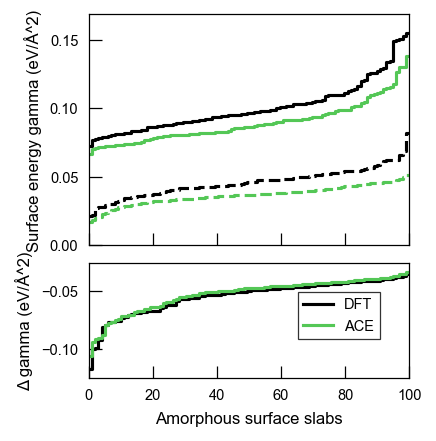

In [8]:
cm=1/2.54
fig, axes= plt.subplots(2,1, figsize=(7*cm,8*cm), sharex=True, height_ratios=[2,1])

gamma_unrelaxed_ace=[]
gamma_relaxed_ace=[]
gamma_unrelaxed_dft=[]
gamma_relaxed_dft=[]
inds=np.arange(29,151,1)

for ind in inds:
    try:
        wdir=f'../../data/paper/a-surfaces/energies/{ind}'
        bulk=read(f'{wdir}/cleave_bulk/OUTCAR')
        bulk_energy_dft=bulk.get_potential_energy()

        cleave_unrelaxed=read(f'{wdir}/cleave_surf/unrelaxed/OUTCAR')
        cleave_unrelaxed_energy_dft=cleave_unrelaxed.get_potential_energy()
        unrelaxed_area=cleave_unrelaxed.cell[0,0]*cleave_unrelaxed.cell[1,1]
        
        cleave_relaxed=read(f'{wdir}/cleave_surf/relaxed/OUTCAR')
        cleave_relaxed_energy_dft=cleave_relaxed.get_potential_energy()        
        relaxed_area=cleave_relaxed.cell[0,0]*cleave_relaxed.cell[1,1]
        

        bulk=read(f'{wdir}/cleave_bulk/POSCAR')
        bulk.calc=calc
        bulk_energy=bulk.get_potential_energy()

        cleave_unrelaxed=read(f'{wdir}/cleave_surf/unrelaxed/POSCAR')
        cleave_unrelaxed.calc=calc
        cleave_unrelaxed_energy=cleave_unrelaxed.get_potential_energy()
        unrelaxed_area=cleave_unrelaxed.cell[0,0]*cleave_unrelaxed.cell[1,1]
        

        cleave_relaxed=read(f'{wdir}/cleave_surf/relaxed/POSCAR')
        cleave_relaxed.calc=calc
        cleave_relaxed_energy=cleave_relaxed.get_potential_energy()        
        relaxed_area=cleave_relaxed.cell[0,0]*cleave_relaxed.cell[1,1]


        gamma_unrelaxed_dft.append((cleave_unrelaxed_energy_dft-bulk_energy_dft)/(2*unrelaxed_area))
        gamma_relaxed_dft.append((cleave_relaxed_energy_dft-bulk_energy_dft)/(2*relaxed_area))
        gamma_unrelaxed_ace.append((cleave_unrelaxed_energy-bulk_energy)/(2*unrelaxed_area))
        gamma_relaxed_ace.append((cleave_relaxed_energy-bulk_energy)/(2*relaxed_area))

    except:
        continue

color_ace="#54C756"
color_dft="black"
linestyle_u='-'
linestyle_r='--'


axes[0].ecdf(gamma_unrelaxed_dft, label='DFT', orientation='horizontal', color=color_dft, linestyle=linestyle_u, linewidth=1.5)
axes[0].ecdf(gamma_relaxed_dft, orientation='horizontal', color=color_dft, linestyle=linestyle_r, linewidth=1.5)
axes[0].ecdf(gamma_unrelaxed_ace, label='ACE', orientation='horizontal', color=color_ace, linestyle=linestyle_u, linewidth=1.5)
axes[0].ecdf(gamma_relaxed_ace, orientation='horizontal', color=color_ace, linestyle=linestyle_r, linewidth=1.5)

axes[0].set_yticks(np.arange(0,0.20,0.05))

axes[1].set_xlabel('Amorphous surface slabs')
axes[0].set_ylabel('Surface energy gamma (eV/Å^2)')
axes[1].set_ylabel('Δ gamma (eV/Å^2)')


rel_dft=np.asarray(gamma_relaxed_dft)-np.asarray(gamma_unrelaxed_dft)
rel_ace=np.asarray(gamma_relaxed_ace)-np.asarray(gamma_unrelaxed_ace)
axes[1].ecdf(rel_dft, label='DFT', orientation='horizontal', color=color_dft, linestyle=linestyle_u, linewidth=1.5)
axes[1].ecdf(rel_ace, label='ACE', orientation='horizontal', color=color_ace, linestyle=linestyle_u, linewidth=1.5)
# axes[1].scatter(rel_dft, rel_ace, color=color_dft)

axes[1].set_yticks(np.arange(-0.1,0.0,0.05))
axes[1].set_xticks(np.arange(0,1.2,0.2))
axes[1].set_xticklabels(np.arange(0,120,20))

plt.subplots_adjust(wspace=0, hspace=0.1)
      
plt.legend()
# # plt.ylim(bottom=0)
plt.savefig('amorphous_energies_v2.svg', dpi=300)